# Telco Churn Data Project

20180594 이정훈

### Module, Data import

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('telco.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. 자료 정리
- 자료를 살펴 전처리가 필요한 부분을 확인하고 어떻게 처리할지 설명하라
- 처리내용과 그 이유를 간단히 설명한다.

In [4]:
data.drop(['customerID'], axis = 1, inplace = True)

customer ID는 필요하지 않은 데이터이므로 삭제한다

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


NaN값을 확인해 본 결과 없는 것으로 나타났다.

### 2.  Summary Stats
**1. 변수들을 정성변수와 정량변수로 나누고, 개별 변수들의 특징을 살펴본다.**

변환이나 문제가 있는 변수들에 대해 설명하고 정량변수를 dummy 변수로 처리하여 상관관계표를 만든다

|변수|문제점|
|:---:|:---:|
|gender| binary class의 data type이 object로 되어 있다|
|Partner| binary class의 data type이 object로 되어 있다|
|Dependents| binary class의 data type이 object로 되어 있다|
|PhoneService| binary class의 data type이 object로 되어 있다|
|MultipleService| Phone Service를 신청하지 않은 사람과 신청한 사람의 정보가 섞여 있다|
|InternetService| 다양한 class가 섞여 있다. dummy variable 변환 필요|
|Service Info 관련변수| binary class의 data type이 object로 되어 있다|
|Contract| 계약의 형태가 object형태로 저장되어 있다|
|PaperlessBilling| binary class의 data type이 object로 되어 있다|
|PaymentMethod| MultiClass 데이터. dummy variable 변환이 필요하다|

**(1) Demographic Information**

- gender: 고객의 성별 (남 or 여) - 정성

- SeniorCitizen: 고객이 Senior인가? (0 or 1) - 정성

- Partner: 고객이 partner가 존재하는가? (Yes, No) - 정성

- Dependents: 고객이 dependent한가 independent한가? (Yes, No) - 정성

**(2) Customer Account Information**
- tenure: 고객이 계약을 유지한 기간 - 정량

- Contract: 약정(계약)의 형태 (월별 선불 / 1년 / 2년) - 정성으로 구분하였다.

- PaperlessBilling: 청구서를 paperless로 받는가? (Yes, No) - 정성

- PaymentMethod: 고객이 요금을 결제하는 방법 (전자결제, 우편결제, 자동 계좌이체, 신용카드) - 정성

- MontlyCharges: 월 청구요금 - 정량

- TotalCharges: 총 결제 요금 - 정량

**(3) Service Information** - 모두 정성 자료이다

- PhoneService: 고객이 phone service가 있는가? - 정성

- MultipleLines: 고객이 다중회선을 사용하는가? (No phone service, No, Yes) - 정성
- InternetServices: Internet Service를 구독하는가? (DSL, Fiber optic, No) - 정성
- OnlineSecurity: Online Security(사이버보안) 서비스를 가지고 있는가? (No internet service, No, Yes)
- OnlineBackup: 고객에게 Onilne Backup 서비스를 가지고 있는가? (No internet service, No, Yes)
- DeviceProtection: 고객이 device protection 서비스를 가지고 있는가? (No internet service, No, Yes)
- TechSupport: 고객이 기술적 support 서비스를 가지고 있는가? (No internet service, No, Yes)
- StreamingTV: 고객이 스트리밍 TV서비스를 가지고 있는가? (No internet service, No, Yes)
- StreamingMovies: 고객이 스트리밍 영화를 가지고 있는가? (No internet service, No, Yes)



In [8]:
from sklearn.preprocessing import LabelEncoder
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])

In [9]:
data = pd.concat([data, pd.get_dummies(data[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']])], axis = 1)

In [10]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No intern

In [11]:
data.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'Churn',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'Contract', 'PaymentMethod', 'MultipleLines_No',
           'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No',
           'OnlineSecurity_No internet service', 'OnlineBackup_No', 
           'OnlineBackup_No internet service', 'DeviceProtection_No',
           'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 
           'StreamingTV_No', 'StreamingTV_No internet service', 
           'StreamingMovies_No', 'StreamingMovies_No internet service',
           'Contract_Month-to-month', 'Churn_No'], axis = 1, inplace = True)

In [12]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,1,...,1,1,1,1,0,0,0,0,1,0
7039,0,0,1,1,72,1,1,103.20,7362.9,1,...,0,1,1,1,0,0,1,0,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,1,0,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,0,0,0,0,0,0,0,0,1,1


In [13]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

**2. 상관관계를 이용하여 변수 선택에 주의해야할 점이 있는지 설명한다.**

In [14]:
data['TotalCharges'][data['TotalCharges'].astype(str) == ' '] = np.nan

In [15]:
data = data.astype(float)

Total Charges column에 empty string data가 존재하여, np.nan값으로 변환한 뒤 data 전체의 data type을 변환시켰다.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   float64
 1   SeniorCitizen                            7043 non-null   float64
 2   Partner                                  7043 non-null   float64
 3   Dependents                               7043 non-null   float64
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   float64
 6   PaperlessBilling                         7043 non-null   float64
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   MultipleLines_Yes                        7043 non-null   float64
 10  InternetService_DSL                      7043 no

TotalCharges 변수에 결측치가 있는 것이 확인되었다. <br>
TotalCharge는 확인이 되지 않는 field의 정보이기도 하고, 추론을 잘못하면 자칫 결과에 큰 영향을 줄 수 있다고 생각했다. 마침 sample도 7000개 이상이었기 때문에, drop을 하고 사용하기로 하였다.

In [17]:
data = data.dropna()

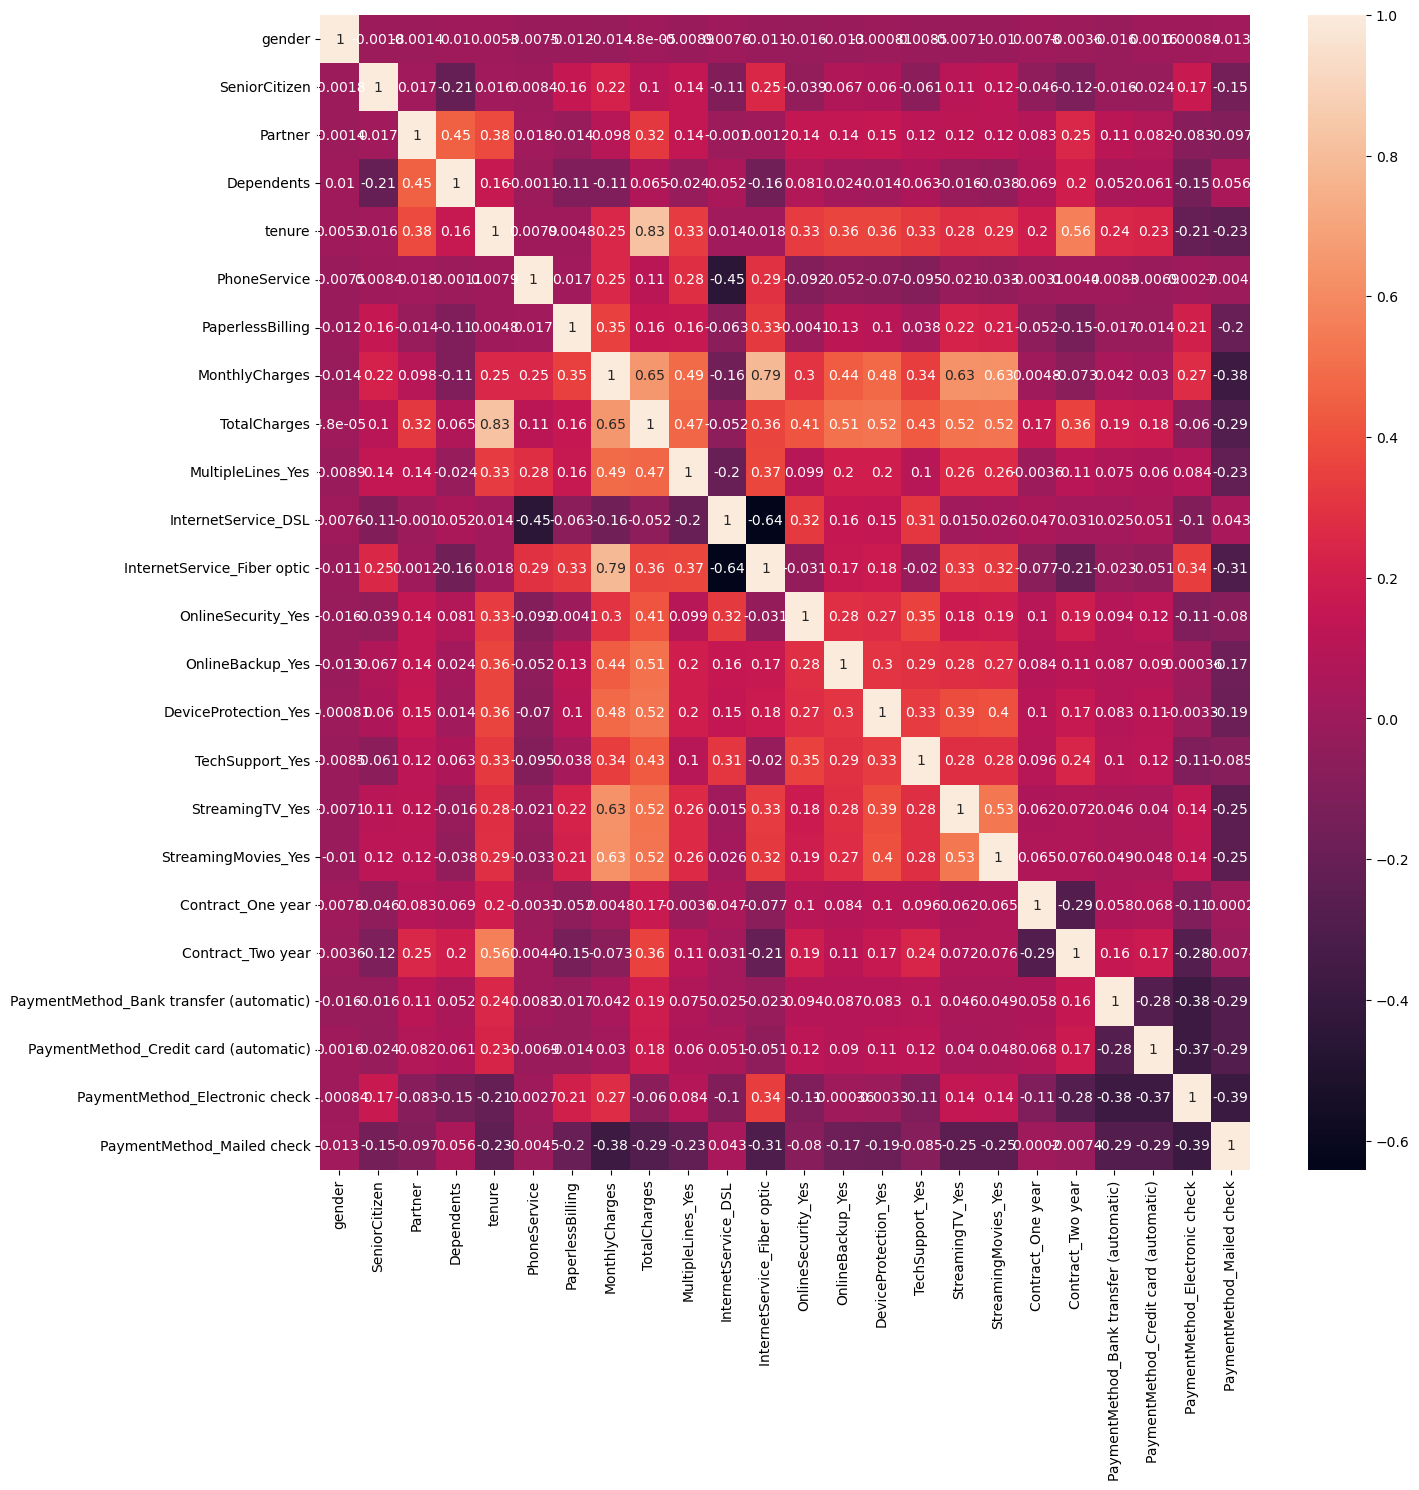

In [18]:
plt.figure(figsize = (15,15))
sns.heatmap(data.drop(['Churn_Yes'], axis = 1).corr(), annot = True )
plt.show()

상관관계를 본 결과, Internet Service 형태는 서로 상반되는 변수이므로 비교적 상관관계가 높게 나왔다.

Total charges와 tenure간의 상관관계도 높게 나왔다.

monthly charge와 Internet Service (Fiber optic) 사이에도 상관관계가 높다는 것으로 나왔다.

변수간 상관관계가 높게 나올 때, 이 모델을 그대로 사용할 경우 다중공선성으로 인해 모델의 분산이 높게 나올 수 있기 때문에 변수 사용에 있어서 유의해야 한다.

In [19]:
import statsmodels.api as sm
X = data.drop(['Churn_Yes'], axis = 1)
y = data['Churn_Yes']
model = sm.OLS(y, X, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Churn_Yes   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:25:13   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender                                     -0.0034      0.009     -0.375      0.707      -0.021       0.014
SeniorCitizen                               0.0445      0.013      3.419      0.001       0.019       0.070
Partner                                    -0.0009      0.011     -0.079      0.937      -0.022       0.020
Dependents                                 -0.0202      0.011     -1.766      0.078      -0.043       0.002
tenure                                     -0.0020      0.001     -3.917      0.000      -0.003      -0.001
PhoneService                               -0.0055      0.089     -0.062      0.951      -0.180       0.169
PaperlessBilling                            0.0449      0.010      4.495      0.000       0.025       0.064
MonthlyCharges                             -0.0013      0.004     -0.303      0.762      -0.010       0.007
TotalCharges                            -4.438e-05   6.48e-06     -6.852      0.000   -5.71e-05   -3.17e-05
MultipleLines_Yes                           0.0587      0.024      2.403      0.016       0.011       0.107
InternetService_DSL                         0.1795      0.111      1.621      0.105      -0.038       0.397
InternetService_Fiber optic                 0.3899      0.219      1.781      0.075      -0.039       0.819
OnlineSecurity_Yes                         -0.0425      0.025     -1.710      0.087      -0.091       0.006
OnlineBackup_Yes                           -0.0113      0.024     -0.462      0.644      -0.059       0.037
DeviceProtection_Yes                        0.0046      0.025      0.185      0.853      -0.044       0.053
TechSupport_Yes                            -0.0439      0.025     -1.754      0.079      -0.093       0.005
StreamingTV_Yes                             0.0638      0.045      1.416      0.157      -0.025       0.152
StreamingMovies_Yes                         0.0658      0.045      1.460      0.144      -0.023       0.154
Contract_One year                          -0.1056      0.014     -7.549      0.000      -0.133      -0.078
Contract_Two year                          -0.0700      0.017     -4.110      0.000      -0.103      -0.037
PaymentMethod_Bank transfer (automatic)     0.2338      0.028      8.361      0.000       0.179       0.289
PaymentMethod_Credit card (automatic)       0.2277      0.028      8.172      0.000       0.173       0.282
PaymentMethod_Electronic check              0.3014      0.027     11.012      0.000       0.248       0.355
PaymentMethod_Mailed check                  0.2270      0.025      8.931      0.000       0.177       0.277
==============================================================================
Omnibus:                      355.806   Durbin-Watson:                   2.004
Prob(Omni

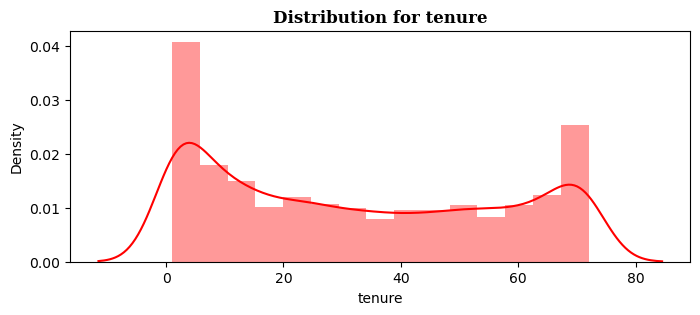

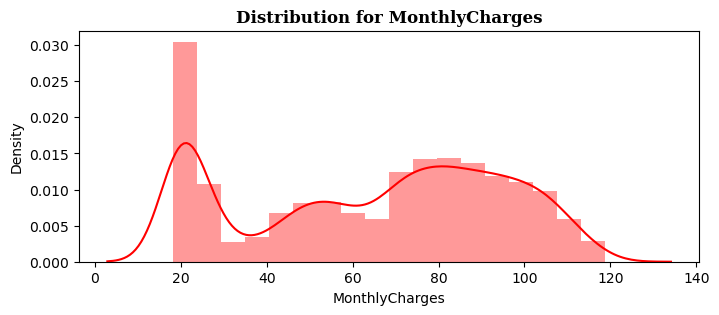

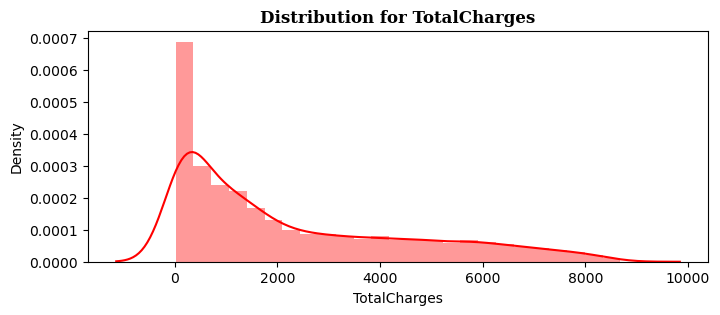

In [20]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols : 
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feat),  fontweight='bold', fontfamily='Serif')
    ax = sns.distplot(data[feat], color = 'r')

정량 변수의 단위가 모두 다르기 때문에, standardization을 진행하여 plot하였다.

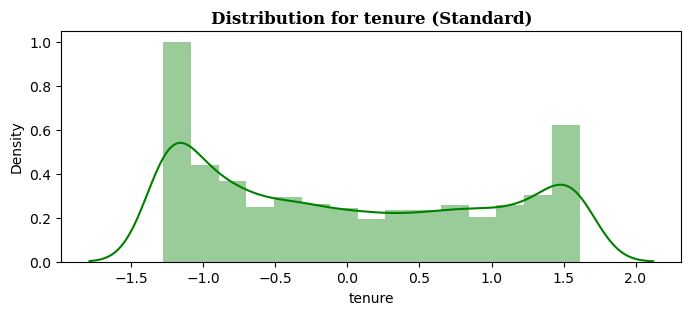

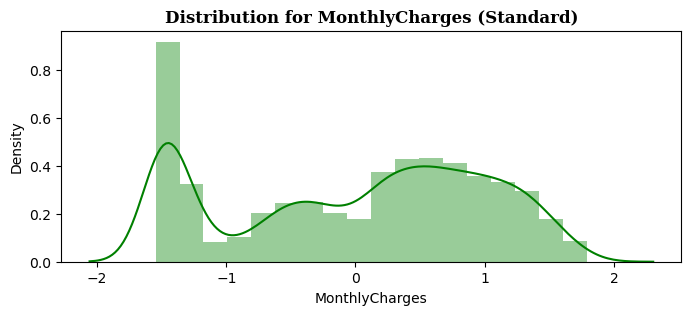

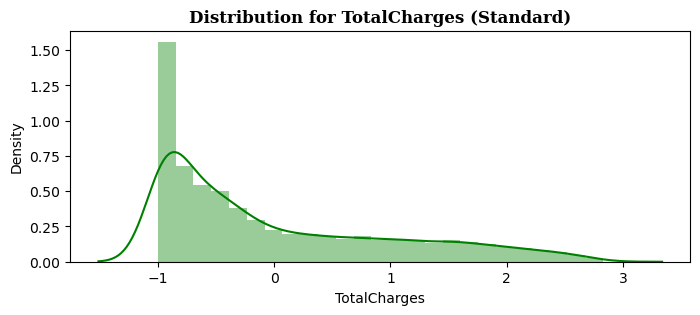

In [21]:
from sklearn.preprocessing import StandardScaler

data_std = pd.DataFrame(StandardScaler().fit_transform(data[num_cols]), columns = num_cols)
for feat in num_cols : 
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {} (Standard)".format(feat),  fontweight='bold', fontfamily='Serif')
    ax = sns.distplot(data_std[feat], color = 'g')

<AxesSubplot:>

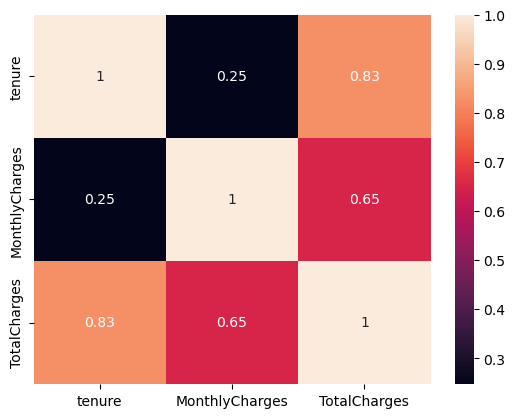

In [22]:
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(), annot = True)

정량 변수들간의 상관관계를 plot하였다. 여전히 Tenure와 Total Charge간 상관관계가 높은 것에 주의하도록 한다.

### 3.  Variation Inflation Factor
- 각 변수들의 variation inflation factor를 구하고 어떤 문제가 있는지 설명하라.
- 판단에 근거하여 사용할 변수를 정리한다

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
temp = data.drop(columns = 'Churn_Yes')
for i in range(len(temp.columns)) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

gender : 1.0021057457790925
SeniorCitizen : 1.1532198392170858
Partner : 1.4629877794154846
Dependents : 1.381598243259398
tenure : 7.58445347510251
PhoneService : 34.89385749300558
PaperlessBilling : 1.2084546776350689
MonthlyCharges : 866.0896396659763
TotalCharges : 10.811489743607424
MultipleLines_Yes : 7.289760903918613
InternetService_DSL : 138.71861800958166
InternetService_Fiber optic : 592.2969219353296
OnlineSecurity_Yes : 6.338349490005173
OnlineBackup_Yes : 6.796677836720875
DeviceProtection_Yes : 6.9247541422417624
TechSupport_Yes : 6.476507707989341
StreamingTV_Yes : 24.080019308900464
StreamingMovies_Yes : 24.15639437413828
Contract_One year : 1.6257837254183047
Contract_Two year : 2.6523280736718315
PaymentMethod_Bank transfer (automatic) : 8.601426380001053
PaymentMethod_Credit card (automatic) : 8.426081297817133
PaymentMethod_Electronic check : 12.633714275019718
PaymentMethod_Mailed check : 7.395258671473938


인터넷 서비스에 따라서 요금이 정해지기 때문에 관련변수인 InternetService의 VIF가 굉장히 높게 나타난다.<br>
InternetService_Fiber optic의 feature를 지워주도록 한다.

In [24]:
data.drop(['InternetService_Fiber optic'], axis = 1, inplace = True)

In [25]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [26]:
temp = data.drop(columns = 'Churn_Yes')
for i in range(len(temp.columns)) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

gender : 1.0019815345027208
SeniorCitizen : 1.1532086434657858
Partner : 1.4625218470001997
Dependents : 1.3814464900389223
tenure : 7.584070078339766
PhoneService : 1.5634304933293386
PaperlessBilling : 1.2077804923090436
MonthlyCharges : 7.239686861503127
TotalCharges : 10.809285303154718
MultipleLines_Yes : 1.5493725189704008
InternetService_DSL : 1.7935449410081483
OnlineSecurity_Yes : 1.5744619387815444
OnlineBackup_Yes : 1.5619305832399528
DeviceProtection_Yes : 1.6336275484047498
TechSupport_Yes : 1.620276970888764
StreamingTV_Yes : 1.9705795173896754
StreamingMovies_Yes : 1.9802634804710328
Contract_One year : 1.6249077999614296
Contract_Two year : 2.6510275027101344
PaymentMethod_Bank transfer (automatic) : 8.591167985399323
PaymentMethod_Credit card (automatic) : 8.416168345665836
PaymentMethod_Electronic check : 12.610705056158043
PaymentMethod_Mailed check : 7.386444902627885


InternetService_Fiber optic의 feature를 지운 결과 VIF가 모든 Feature에 대해 상당히 안정적이게 된 것을 알 수 있다

### 4.  Logistic regression 과 feature selection
- 분석결과의 평가를 위해 logistic regression의 추정결과를 구한다.
    1. Training set와 test set으로 나눈다.
    2. L1 penalty와 GridSearchCV으로 최적 모수값에서 어떤 feature들이 분석에서 제외되는지 확인한다.
    3. 어떤 scoring이 이런 종류의 분석에 적합한지 설명하라.
    4. confusion matrix를 구한다.

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = 'Churn_Yes')
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

logistic = LogisticRegression(penalty = 'l1', solver = 'liblinear')
logistic.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [29]:
for i in range(len(X_train.columns)) :
    print(X_train.columns[i], ':', logistic.coef_[0][i])

gender : -0.021220959756200076
SeniorCitizen : 0.22361024529804868
Partner : 0.12367124880299449
Dependents : -0.24040268487595023
tenure : -0.061192219441128126
PhoneService : -1.1563782605072914
PaperlessBilling : 0.2072381124694995
MonthlyCharges : 0.029714539657550772
TotalCharges : 0.00032880533757630387
MultipleLines_Yes : 0.038485576947150595
InternetService_DSL : -0.05373449210710413
OnlineSecurity_Yes : -0.5437206683388424
OnlineBackup_Yes : -0.2410853375520653
DeviceProtection_Yes : -0.18447061712656868
TechSupport_Yes : -0.5219657221486419
StreamingTV_Yes : -0.07167253400740166
StreamingMovies_Yes : -0.07519296283954612
Contract_One year : -0.8186937319891071
Contract_Two year : -1.4035572330620123
PaymentMethod_Bank transfer (automatic) : -0.1420040962345182
PaymentMethod_Credit card (automatic) : -0.3032568730493795
PaymentMethod_Electronic check : 0.05318325659796077
PaymentMethod_Mailed check : -0.27591038004568974


Preprocessing을 이미 한 결과 cutting되는 feature는 존재하지 않았다.

In [30]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {'fit_intercept' : [True, False], 
                   'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
                   'C' : np.linspace(-1000,1000),
                   'solver' : ['liblinear','lbfgs','newton-cg','sag','saga']}

gsearch = GridSearchCV(logistic, hyperparameters, verbose = 1, scoring = 'recall')
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([-1000.        ,  -959.18367347,  -918.36734694,  -877.55102041,
        -836.73469388,  -795.91836735,  -755.10204082,  -714.28571429,
        -673.46938776,  -632.65306122,  -591.83673469,  -551.02040816,
        -510.20408163,  -469.3877551 ,  -428.57142857,  -387.75510204,
        -346.93877551,  -306.12244898,  -265.306...
         306.12244898,   346.93877551,   387.75510204,   428.57142857,
         469.3877551 ,   510.20408163,   551.02040816,   591.83673469,
         632.65306122,   673.46938776,   714.28571429,   755.10204082,
         795.91836735,   836.73469388,   877.55102041,   918.36734694,
         959.18367347,  1000.        ]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                         

In [31]:
model = LogisticRegression(**gsearch.best_params_)
model.fit(X_train, y_train)

LogisticRegression(C=510.204081632653, penalty='l1', solver='liblinear')

In [32]:
for i in range(len(X_train.columns)) :
    print(X_train.columns[i], ':', model.coef_[0][i])

gender : -0.023826529490188975
SeniorCitizen : 0.2254375388759398
Partner : 0.13693569134135386
Dependents : -0.24752651347914198
tenure : -0.0610372914153441
PhoneService : -1.174483934231353
PaperlessBilling : 0.21501824379473414
MonthlyCharges : 0.030635475424092264
TotalCharges : 0.0003315724656763477
MultipleLines_Yes : 0.03636196759569703
InternetService_DSL : -0.035934735353768066
OnlineSecurity_Yes : -0.5567992274008865
OnlineBackup_Yes : -0.25626048640625887
DeviceProtection_Yes : -0.19558881618029791
TechSupport_Yes : -0.5307311724203354
StreamingTV_Yes : -0.09054305959050091
StreamingMovies_Yes : -0.0940683911596476
Contract_One year : -0.8284499433716084
Contract_Two year : -1.430900088337742
PaymentMethod_Bank transfer (automatic) : -0.4900928814261846
PaymentMethod_Credit card (automatic) : -0.650843769329077
PaymentMethod_Electronic check : -0.2865938863884082
PaymentMethod_Mailed check : -0.6107772960553159


In [33]:
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5, 1.0, 'Confusion Matrix')

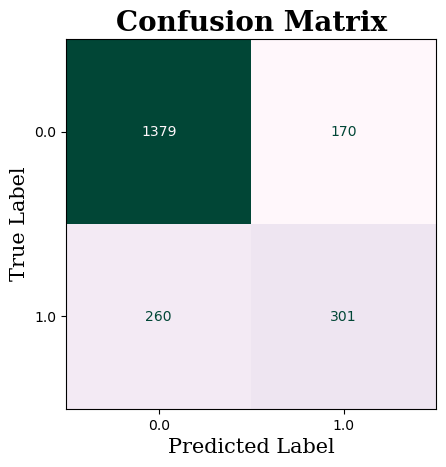

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

이 문제에서, 통신사는 나갈 사람(churn)중 실제로 나가는 사람을 대상으로 프로모션 등을 지급해야 고객을 오래 붙잡을 수 있기 때문에, precision보다는 recall이 score에 더 적합하다.

만약 precision을 우선하여 모델을 만들 경우, 나가지 않을 사람에게 프로모션을 제안하게 되므로 회사 입장에서 불필요한 지출이 발생할 가능성이 있기 떄문에, recall이 더 적절하다. 

단, 여기서 recall은 Target이 1.0인 recall이다. 여기서 recall의 값은 0.54로 그렇게 좋은 성능을 보이진 않는다.

### 5  Naïve Bayes
#### 5.1  Discrete tenure
- BernoulliNB는 feature가 이항분포일때, multinomialNB는 multinomial distribution일때 사용한다.
- MultinomialNB는 연속변수에도 적용이 가능하지만 분포에 대한 조건을 주의해서 살펴야한다.
- MultinomialNB로 분류기를 만들고 test data의 confusion matrix를 구한다.

In [35]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [36]:
predicted = MNB.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.63      0.73      1549
         1.0       0.42      0.74      0.53       561

    accuracy                           0.66      2110
   macro avg       0.64      0.68      0.63      2110
weighted avg       0.75      0.66      0.68      2110



Text(0.5, 1.0, 'Confusion Matrix')

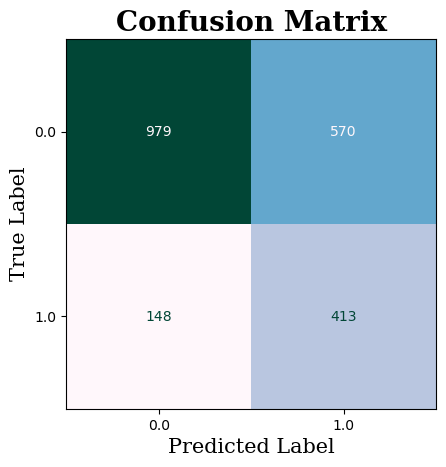

In [37]:
plot_confusion_matrix(MNB, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

recall의 값이 0.74로 logistic regression보다 이 문제에 있어서 더 좋은 결과가 나왔다.

### 5.2  Grouping tenure
- Tenure 변수를 6개월 단위로 discretize 한 후 tenure를 대체한다.
    - pd.cut 이나 np.digitize를 사용할 수 있다.
    - 둘은 끝점의 포함여부가 다르다.어떤 것이 적합한지 설명한다.
1. 모든 작업을 반영한 feature를 이용해 각 변수의 VIF를 구해본다.
2. Discretized data를 이용하여 MultinomialNB 분류기를 만들고 test data의 confusion matrix를 구하고 월 단위 tenure를 사용한 분류기와 어떤 차이가 있는지 설명한다.

In [38]:
import copy
data_6 = copy.deepcopy(data)

In [39]:
data_6['tenure'] = np.digitize(data_6['tenure'], bins = [6*(i+1) for i in range(100)])

In [40]:
temp = data_6.drop(columns = 'Churn_Yes')
for i in range(len(temp.columns)) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

gender : 1.001985621575185
SeniorCitizen : 1.153147749458364
Partner : 1.4613563702124661
Dependents : 1.3814463594305362
tenure : 7.580973014510309
PhoneService : 1.563265578071128
PaperlessBilling : 1.2079774226456566
MonthlyCharges : 7.238221665140447
TotalCharges : 10.831773306103965
MultipleLines_Yes : 1.5486875281352661
InternetService_DSL : 1.7940178261658384
OnlineSecurity_Yes : 1.5742949758235798
OnlineBackup_Yes : 1.5620466608705708
DeviceProtection_Yes : 1.6340471897274413
TechSupport_Yes : 1.6212189141434858
StreamingTV_Yes : 1.9707499813237188
StreamingMovies_Yes : 1.9799522114605295
Contract_One year : 1.6184476876677751
Contract_Two year : 2.657040064043046
PaymentMethod_Bank transfer (automatic) : 8.264955400589292
PaymentMethod_Credit card (automatic) : 8.098672163341115
PaymentMethod_Electronic check : 12.124492552572116
PaymentMethod_Mailed check : 7.121212956658856


VIF값은 크게 달라지지 않았다.

In [41]:
X = data_6.drop(columns = 'Churn_Yes')
y = data_6['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [43]:
predicted = MNB.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.61      0.72      1549
         1.0       0.41      0.73      0.52       561

    accuracy                           0.64      2110
   macro avg       0.63      0.67      0.62      2110
weighted avg       0.74      0.64      0.66      2110



Text(0.5, 1.0, 'Confusion Matrix')

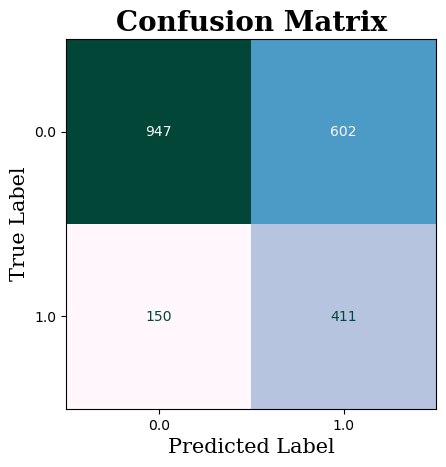

In [44]:
plot_confusion_matrix(MNB, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

numpy.digitizer(  )을 사용한 결과 recall의 성능은 오히려 1% 하락하였다.

In [45]:
data_6['tenure'] = pd.cut(data['tenure'].values, [6*i for i in range(100)], labels = False, retbins = False, right = False)

In [46]:
temp = data_6.drop(columns = 'Churn_Yes')
for i in range(len(temp.columns)) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

gender : 1.001985621575185
SeniorCitizen : 1.153147749458364
Partner : 1.4613563702124661
Dependents : 1.3814463594305362
tenure : 7.580973014510309
PhoneService : 1.563265578071128
PaperlessBilling : 1.2079774226456566
MonthlyCharges : 7.238221665140447
TotalCharges : 10.831773306103965
MultipleLines_Yes : 1.5486875281352661
InternetService_DSL : 1.7940178261658384
OnlineSecurity_Yes : 1.5742949758235798
OnlineBackup_Yes : 1.5620466608705708
DeviceProtection_Yes : 1.6340471897274413
TechSupport_Yes : 1.6212189141434858
StreamingTV_Yes : 1.9707499813237188
StreamingMovies_Yes : 1.9799522114605295
Contract_One year : 1.6184476876677751
Contract_Two year : 2.657040064043046
PaymentMethod_Bank transfer (automatic) : 8.264955400589292
PaymentMethod_Credit card (automatic) : 8.098672163341115
PaymentMethod_Electronic check : 12.124492552572116
PaymentMethod_Mailed check : 7.121212956658856


마찬가지로 VIF는 크게 달라지지 않았다.

In [47]:
X = data_6.drop(columns = 'Churn_Yes')
y = data_6['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [49]:
predicted = MNB.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.61      0.72      1549
         1.0       0.41      0.73      0.52       561

    accuracy                           0.64      2110
   macro avg       0.63      0.67      0.62      2110
weighted avg       0.74      0.64      0.66      2110



Text(0.5, 1.0, 'Confusion Matrix')

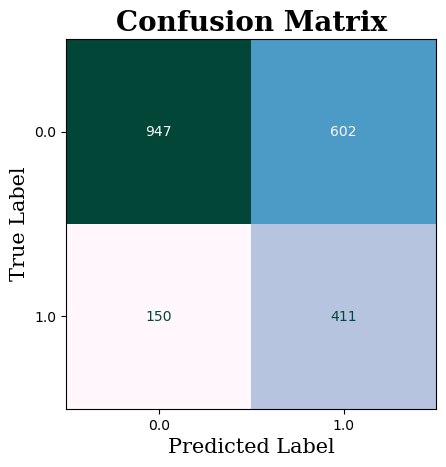

In [50]:
plot_confusion_matrix(MNB, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

pandas.cut을 사용해도 numpy.digitizer와 결과가 다른점은 없었다.

numpy.digitizer는 왼쪽 구간이 닫히는 반면, pandas.cut은 오른쪽 구간이 닫힌다. 통상적으로 생각하면 계약은 당월부터 효력이 생기기 때문에 왼쪽구간이 닫힌 numpy.digitizer를 사용하는 것이 좋다고 생각한다.

월 단위 tenure와 비교해서, FP와 FN모두 증가하였고, TP와 TN은 오히려 감소하였다. 이는 변수간 다중공선성이 해결되지 않았기 때문에 Naive Bayes에서 오히려 모델의 분산이 증가했다고 본다.

### 6. 자료 저장
- Target과 feature를 합쳐 to_pickle로 저장한다.
- 강의자료 6과 10, 그리고 과제 5에서 이 자료를 사용한다.

In [51]:
import pickle

data.to_pickle("./churn.pkl")
data_6.to_pickle("./churn6.pkl")

### 7. SVM
- 적당한 strength, kernel 과 degree 의 범위를 선택하고 GridSearchCV를 이용하여 최적모형을 선택하고 confusion matrix를 만든다.
- 앞선 모형들의 예측과 비교하고, 눈에 띄는 차이가 있다면 그 원인을 설명해 본다.

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = data.drop(columns = 'Churn_Yes')
y = data['Churn_Yes']

C = [0.01, 0.1, 0., 1.0, 10.0]
degrees = [1,2,3,5]
coefs = [0,1,10]
kernels = ['rbf', 'sigmoid']
gammas = ['scale', 'auto']
model = SVC()

hyperparameters = {'kernel' : kernels,
                   'coef0' : coefs,
                   'degree' : degrees,
                   'gamma' : gammas,
                   'C' : C}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

gsearch = GridSearchCV(model, hyperparameters, verbose = 5)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.9s
[CV 2/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.9s
[CV 3/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.9s
[CV 4/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.9s
[CV 1/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 2/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 3/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 4/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.01, coef0=0, degree=1, gamma=s

[CV 4/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 1/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 2/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 3/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 4/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 1/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.0s
[CV 2/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.0s
[CV 3/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.1s
[CV 4/5] END 

[CV 3/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   1.0s
[CV 4/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 5/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   1.0s
[CV 1/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.0s
[CV 2/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.0s
[CV 3/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   0.9s
[CV 4/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.0s
[CV 5/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.731 total time=   1.1s
[CV 1/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5

[CV 1/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.757 total time=   1.1s
[CV 2/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.742 total time=   1.0s
[CV 3/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.753 total time=   1.1s
[CV 4/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.743 total time=   1.0s
[CV 5/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.751 total time=   1.1s
[CV 1/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 4/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 5/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 1/5] END C=0.1, coef0=0, d

[CV 1/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 4/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 5/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 1/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 4/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 1/5] END C=0.1, coef0

[CV 5/5] END C=0.1, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 5/5] EN

[CV 3/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=1, degree=3, gamma=sca

[CV 1/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, coef0=0, degree=1, g

[CV 1/5] END C=1.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=1.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5] END C=1.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 4/5] END C=1.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 5/5] END C=1.0, coef0=0, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=12.1min
[CV 1/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 4/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 5/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 1/5] END C=1.0, coef0

[CV 5/5] END C=1.0, coef0=1, degree=5, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 1/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 4/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   6.2s
[CV 5/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.8s
[CV 1/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.8s
[CV 2/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 3/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 4/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.731 total time=   0.9s
[CV 5/5] END

[CV 4/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.743 total time=   0.8s
[CV 5/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.740 total time=   0.8s
[CV 1/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.571 total time=   0.6s
[CV 2/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.585 total time=   0.6s
[CV 3/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.583 total time=   0.6s
[CV 4/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.609 total time=   0.6s
[CV 5/5] END C=10.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.602 total time=   0.6s
[CV 1/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.768 total time=   1.1s
[CV 2/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.764 total time=   1.1s
[CV 3/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.746 total time=   1.1s
[CV 4/5] END 

[CV 3/5] END C=10.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.600 total time=   0.6s
[CV 4/5] END C=10.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.603 total time=   0.6s
[CV 5/5] END C=10.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.600 total time=   0.6s
[CV 1/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.768 total time=   1.1s
[CV 2/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.764 total time=   1.5s
[CV 3/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.746 total time=   1.1s
[CV 4/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.765 total time=   1.1s
[CV 5/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.760 total time=   1.2s
[CV 1/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5] END C=10

[CV 1/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.768 total time=   1.1s
[CV 2/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.764 total time=   1.1s
[CV 3/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.746 total time=   1.1s
[CV 4/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.765 total time=   1.1s
[CV 5/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.760 total time=   1.2s
[CV 1/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 2/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 3/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 4/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   6.0s
[CV 5/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.731 total time=   0.5s
[CV 1/5] E

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.0, 1.0, 10.0], 'coef0': [0, 1, 10],
                         'degree': [1, 2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=5)

In [53]:
SVC = SVC(**gsearch.best_params_)
SVC.fit(X_train, y_train)

SVC(coef0=0, degree=1, gamma='auto')

In [54]:
predicted = SVC.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      1566
         1.0       0.63      0.25      0.36       544

    accuracy                           0.77      2110
   macro avg       0.71      0.60      0.61      2110
weighted avg       0.75      0.77      0.73      2110



Text(0.5, 1.0, 'Confusion Matrix')

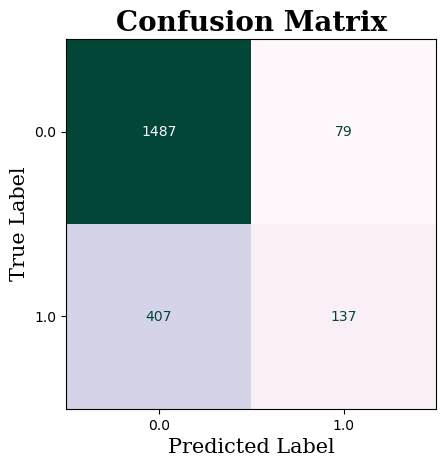

In [55]:
plot_confusion_matrix(SVC, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

Label 0에 대해서는 SVM의 recall score가 더 높게 나왔지만 Label 1에 대해서는 확연히 낮게 나왔다. 이는, hyper space에서 soft margin내에 혼동되는 데이터 관측치들이 많기 때문인 것으로 보인다. 이에 따라 많은 데이터들이 False(0)값으로 분류되어, False Negative의 수가 증가한 것으로 생각된다.

### 8. BONUS
- 상관계수의 절대값이 일정수준 이상인 변수를 제거하는 코드를 작성한다.
- 추론을 위해서라면 상관관계가 높거나 VIF 큰 변수들이 포함되어 있을 때 어떤 변수를 분석에서 제외하여야 하는지 자명하지 않다.
- 예측이 목적이라면 어떤 변수를 제외해도 별 문제가 없을 수 있지만 하나의 통계량을 기준으로 하는 것이므로 가능하면 시각화를 통해 확인한다.
- 이 코드는 동일한 column을 제거하는데 사용할 수 있다.
- df.T.drop_duplicate().T는 표본의 크기가 클 때 메모리 부족으로 사용이 어려울 수 있다.

상관계수의 절댓값 즉, VIF가 일정수준보다 크면 변수를 제거하는 코드를 작성한다

In [56]:
info = []
temp = data.drop(columns = 'Churn_Yes')
for i in range(len(temp.columns)) :
    if float(variance_inflation_factor(temp,i)) > 10 :
        info.append(temp.columns[i])
temp.drop(columns = info, inplace = True)

In [57]:
info = []
for i in range(len(temp.columns)) :
    if float(variance_inflation_factor(temp,i)) > 10 :
        info.append(temp.columns[i])
temp.drop(columns = info, inplace = True)

In [58]:
for i in range(len(temp.columns)) :
    print(temp.columns[i], ':', variance_inflation_factor(temp,i))

gender : 1.8034217061292679
SeniorCitizen : 1.3231212385926319
Partner : 2.796682678722187
Dependents : 1.936887662246385
tenure : 7.513970887416462
PaperlessBilling : 2.333537424834508
MultipleLines_Yes : 2.183005141038195
InternetService_DSL : 1.8687249052014818
OnlineSecurity_Yes : 1.8813651145518315
OnlineBackup_Yes : 2.0127870951293834
DeviceProtection_Yes : 2.176278100096136
TechSupport_Yes : 2.0117054056765395
StreamingTV_Yes : 2.545625675964104
StreamingMovies_Yes : 2.5732815226208787
Contract_One year : 1.9325794468987887
Contract_Two year : 3.077340326188381
PaymentMethod_Bank transfer (automatic) : 1.7214930592951818
PaymentMethod_Credit card (automatic) : 1.7330348740451942
PaymentMethod_Mailed check : 1.490646094652805


In [59]:
X = temp
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0., 1.0, 10.0]
degrees = [1,2,3,5]
coefs = [0,1,10]
kernels = ['rbf', 'sigmoid']
gammas = ['scale', 'auto']
model = SVC()

hyperparameters = {'kernel' : kernels,
                   'coef0' : coefs,
                   'degree' : degrees,
                   'gamma' : gammas,
                   'C' : C}

gsearch = GridSearchCV(model, hyperparameters, verbose = 5)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 2/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.734 total time=   0.7s
[CV 4/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.735 total time=   6.5s
[CV 5/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.735 total time=   0.7s
[CV 1/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 4/5] END C=0.01, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.6s
[CV 5/5] END C=0.01, coef0=0, degree=1, gamma=s

[CV 4/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.735 total time=   0.8s
[CV 5/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.735 total time=   0.7s
[CV 1/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.7s
[CV 2/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.7s
[CV 3/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.7s
[CV 4/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.7s
[CV 5/5] END C=0.01, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.7s
[CV 1/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   0.8s
[CV 2/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.01, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   0.8s
[CV 4/5] END 

[CV 3/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 4/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 5/5] END C=0.01, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 1/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   6.3s
[CV 2/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.734 total time=   0.8s
[CV 4/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.735 total time=   0.8s
[CV 5/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.735 total time=   0.8s
[CV 1/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=0.01, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5

[CV 1/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.745 total time=   0.8s
[CV 2/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.764 total time=   0.8s
[CV 3/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.793 total time=   0.8s
[CV 4/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.765 total time=   0.8s
[CV 5/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.790 total time=   0.8s
[CV 1/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 4/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.735 total time=   0.6s
[CV 5/5] END C=0.1, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.758 total time=  48.9s
[CV 1/5] END C=0.1, coef0=0, d

[CV 1/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 4/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.735 total time=   0.6s
[CV 5/5] END C=0.1, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.767 total time=   0.5s
[CV 1/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 2/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   5.6s
[CV 4/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.735 total time=   0.8s
[CV 5/5] END C=0.1, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.735 total time=   0.8s
[CV 1/5] END C=0.1, coef0

[CV 5/5] END C=0.1, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.735 total time=   0.7s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.734 total time=   0.7s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.735 total time= 2.9min
[CV 5/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.735 total time=   0.8s
[CV 1/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 2/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 3/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 4/5] END C=0.1, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 5/5] EN

[CV 3/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=1, degree=2, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=1, degree=3, gamm

[CV 5/5] END C=0.0, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.751 total time=   0.8s
[CV 2/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.748 total time=   0.8s
[CV 3/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.790 total time=   0.8s
[CV 4/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.759 total time=   0.8s
[CV 5/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=rbf;, score=0.772 total time=   0.8s
[CV 1/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.631 total time=10.7min
[CV 2/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.636 total time=   0.5s
[CV 3/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.644 total time=   0.5s
[CV 4/5] END C=1.0, coef0=0, degree=1, gamma=scale, kernel=sigmoid;, score=0.674 total time=   0.5s
[CV 5/5] END C=1.0, co

[CV 5/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=rbf;, score=0.772 total time=   0.8s
[CV 1/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.617 total time=   0.5s
[CV 2/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.637 total time=   0.5s
[CV 3/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.630 total time=   0.6s
[CV 4/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.671 total time=   0.6s
[CV 5/5] END C=1.0, coef0=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.641 total time=   0.6s
[CV 1/5] END C=1.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.771 total time=   0.7s
[CV 2/5] END C=1.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.777 total time= 1.4min
[CV 3/5] END C=1.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.804 total time=   0.7s
[CV 4/5] END C=1.0, coef0=1, degree=1, gamma=auto, kernel=rbf;, score=0.779 total time=   0.7s
[CV 5/5] END C=1.0, coef

[CV 4/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 5/5] END C=1.0, coef0=10, degree=1, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[CV 1/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.771 total time= 7.3min
[CV 2/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.777 total time=   0.7s
[CV 3/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.804 total time=   0.7s
[CV 4/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.779 total time=   0.7s
[CV 5/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=rbf;, score=0.800 total time=   0.8s
[CV 1/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 2/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 3/5] END C=1.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.734 total time=   0.6s
[CV 4/5] END C=1.0

[CV 3/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.790 total time=   0.8s
[CV 4/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.773 total time=   0.8s
[CV 5/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=rbf;, score=0.800 total time=   0.8s
[CV 1/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.503 total time=   0.6s
[CV 2/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.524 total time=   0.6s
[CV 3/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.500 total time=   0.6s
[CV 4/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.521 total time=   0.6s
[CV 5/5] END C=10.0, coef0=0, degree=1, gamma=auto, kernel=sigmoid;, score=0.760 total time= 1.8min
[CV 1/5] END C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.777 total time=   0.7s
[CV 2/5] END C=10.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.778 total time=   0.7s
[CV 3/5] END C=10.

[CV 2/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.541 total time=   0.6s
[CV 3/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.524 total time=   0.6s
[CV 4/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.540 total time=   0.6s
[CV 5/5] END C=10.0, coef0=1, degree=1, gamma=auto, kernel=sigmoid;, score=0.760 total time= 2.0min
[CV 1/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.777 total time=   0.7s
[CV 2/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.778 total time=   0.7s
[CV 3/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.800 total time=   0.7s
[CV 4/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.779 total time=   0.7s
[CV 5/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=rbf;, score=0.808 total time=   0.7s
[CV 1/5] END C=10.0, coef0=1, degree=2, gamma=scale, kernel=sigmoid;, score=0.602 total time=   0.5s
[CV 2/5] END C

[CV 5/5] END C=10.0, coef0=10, degree=1, gamma=auto, kernel=sigmoid;, score=0.735 total time=   0.7s
[CV 1/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.777 total time=   0.7s
[CV 2/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.778 total time=   0.7s
[CV 3/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.800 total time=   0.7s
[CV 4/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.779 total time=   0.7s
[CV 5/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=0.808 total time=   0.7s
[CV 1/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 2/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=  23.6s
[CV 3/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.734 total time=   0.8s
[CV 4/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.735 total time=   0.8s
[

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.0, 1.0, 10.0], 'coef0': [0, 1, 10],
                         'degree': [1, 2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=5)

In [61]:
SVC = SVC(**gsearch.best_params_)
SVC.fit(X_train, y_train)

SVC(C=10.0, coef0=0, degree=1)

In [62]:
predicted = SVC.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      1549
         1.0       0.68      0.37      0.48       561

    accuracy                           0.79      2110
   macro avg       0.74      0.65      0.67      2110
weighted avg       0.77      0.79      0.76      2110



Text(0.5, 1.0, 'Confusion Matrix')

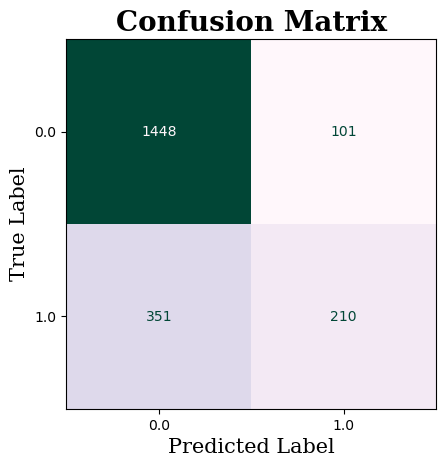

In [63]:
plot_confusion_matrix(SVC, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

In [64]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [65]:
predicted = MNB.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1549
         1.0       0.55      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110



Text(0.5, 1.0, 'Confusion Matrix')

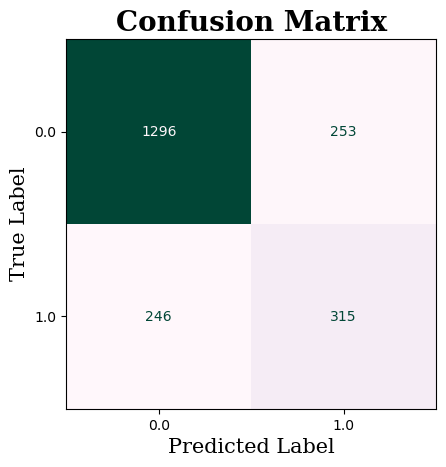

In [66]:
plot_confusion_matrix(MNB, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

SVM에서 FN의 갯수가 줄어들었으나, Multinomial Naive Bayes에서는 오히려 성능이 하락하였다.